## Exploratory Data Analysis

- Analyzing float type data (mostly nutrient-related data)
- Analyzing categorical data:
   - source
   - diet label
   - health label
   - cautions
   - cuisine type
   - dish type
   - ingredient categories

In [2]:
#Libraries for general analysis and data set manipulation:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [3]:
df_recs = pd.read_csv('./data/df_recs_clean_final_nutr_sc.csv')

In [5]:
df_recs.head()

,title,url,yield,total_weight,total_time,calories_per_serv,total_weight_per_serv,total_time_per_serv,monounsat_fat_g_per_serv,polyunsat_fat_g_per_serv,...,ingredient_category_water,ingredient_category_wines,ingredient_category_yogurt,ingredient_category_condiments_and_sauces,ingredient_category_cured_meats,ingredient_category_frozen_poultry,ingredient_category_plant_based_protein,ingredient_category_liquors_and_cocktails,ingredient_category_sugar_and_syrups,nutrition_score
0,Martini Recipe,http://www.seriouseats.com/recipes/2010/06/the...,2.0,85.627736,0.0,87.178569,42.813868,0.0,0.000000,0.000000,...,0,1,0,0,0,0,0,1,0,9
1,Pasta Dough,http://www.marthastewart.com/337857/pasta-dough,6.0,603.500000,60.0,354.023333,100.583333,10.0,8.329406,2.791117,...,0,0,0,0,0,0,0,0,0,13
2,Classic Negroni Cocktail Recipe,http://www.saveur.com/article/Recipes/Negroni-...,2.0,85.048569,0.0,81.788374,42.524285,0.0,0.000000,0.000000,...,0,1,0,0,0,0,0,1,0,9
3,Simple Fresh Pasta,http://food52.com/recipes/27825-simple-fresh-p...,6.0,452.134955,0.0,217.750000,75.355826,0.0,0.958000,0.684250,...,0,0,0,1,0,0,0,0,0,7
4,Egg Noodle,http://www.epicurious.com/recipes/food/views/E...,6.0,559.808863,0.0,301.271778,93.301477,0.0,1.648888,0.943102,...,0,0,0,1,0,0,0,0,0,13


In [7]:
df_recs.isnull().sum().sum()

0

In [8]:
df_recs.dtypes.value_counts()

int64      302
float64     34
object       2
dtype: int64

### Inspecting Float Value Distributions in the Recipes Dataset

In [10]:
cols_floats = df_recs.select_dtypes(include = float).columns
cols_floats

Index(['yield', 'total_weight', 'total_time', 'calories_per_serv',
       'total_weight_per_serv', 'total_time_per_serv',
       'monounsat_fat_g_per_serv', 'polyunsat_fat_g_per_serv',
       'trans_fat_g_per_serv', 'sugar_g_per_serv',
       'calcium_pct_div100_per_serv', 'carbs_pct_div100_per_serv',
       'cholesterol_pct_div100_per_serv', 'energy_pct_div100_per_serv',
       'sat_fat_pct_div100_per_serv', 'fat_pct_div100_per_serv',
       'iron_pct_div100_per_serv', 'fiber_pct_div100_per_serv',
       'folate_pct_div100_per_serv', 'potassium_pct_div100_per_serv',
       'magnesium_pct_div100_per_serv', 'sodium_pct_div100_per_serv',
       'niacin_pct_div100_per_serv', 'phosphorus_pct_div100_per_serv',
       'protein_pct_div100_per_serv', 'riboflavin_pct_div100_per_serv',
       'thiamin_pct_div100_per_serv', 'vit_A_pct_div100_per_serv',
       'vit_B6_pct_div100_per_serv', 'vit_B12_pct_div100_per_serv',
       'vit_C_pct_div100_per_serv', 'vit_D_pct_div100_per_serv',
       'vit_E

In [123]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, bin_num, xlims):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure have enough rows
    fig, ax = plt.subplots(nrows = nrows, ncols = 2, sharey=False) # (I decided to go with pre-set figsize)
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.suptitle(list_of_titles) #Setting title for group of plots
    #ax[0].set_ylabel('Count (Frequency)') #Setting y-axis label for subplot i
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], bins = bin_num[i], edgecolor = 'black') # used settings (chose to use 10 bins)
        ax[i].set_xlabel(list_of_xlabels[i]) #Setting x-axis label for subplot i  
        ax[i].set_ylabel('Count (Frequency)') 
        ax[i].set_xlim(0, xlims[i])
    fig.tight_layout() #this helped to increase space between subplot histograms
    plt.subplots_adjust(top=0.9) #this helped to increase space between the title and the subplot histograms

#Sources used to write function:
#Used the link above (https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) 
#as well as the following link to format plots as desired:
#https://stackoverflow.com/questions/8248467/matplotlib-tight-layout-doesnt-take-into-account-figure-suptitle
#https://stackoverflow.com/questions/6963035/pyplot-axes-labels-for-subplots
#https://stackoverflow.com/questions/42741687/python-histogram-outline

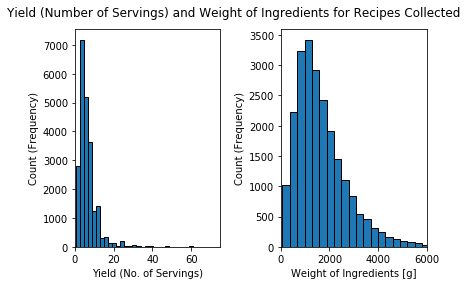

In [124]:
#Plotting total yield and weight for recipes dataframe:
subplot_histograms(dataframe = df_recs, 
                   list_of_columns = ['yield', 'total_weight'],
                   list_of_titles = 'Yield (Number of Servings) and Weight of Ingredients for Recipes Collected',
                   list_of_xlabels = ['Yield (No. of Servings)', 'Weight of Ingredients [g]'],
                   bin_num = [300, 1000],
                   xlims = [75, 6000])

It's pretty amazing that some recipes yield up to 60 servings!  It is also interesting that some recipes have ingredient weights of up to 6000 g.

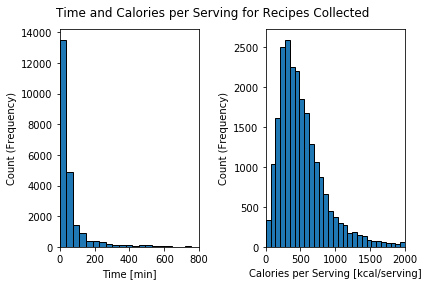

In [125]:
#Plotting total time and kcal/serving for recipes dataframe:
subplot_histograms(dataframe = df_recs, 
                   list_of_columns = ['total_time', 'calories_per_serv'],
                   list_of_titles = 'Time and Calories per Serving for Recipes Collected',
                   list_of_xlabels = ['Time [min]', 'Calories per Serving [kcal/serving]'],
                   bin_num = [800, 400],
                   xlims = [800, 2000])

Its amazing that some recipes have a cook time of over 600 minutes.  I hope those are crockpot recipes!  It is concerning that there are some recipes with up to 2000 kcal per serving.

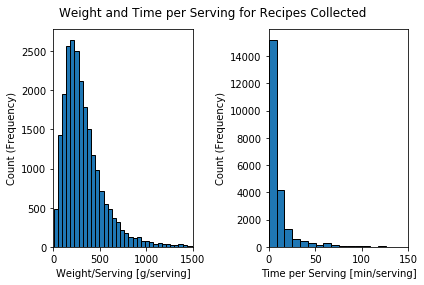

In [331]:
#Plotting total time and kcal/serving for recipes dataframe:
subplot_histograms(dataframe = df_recs, 
                   list_of_columns = ['total_weight_per_serv', 'total_time_per_serv'],
                   list_of_titles = 'Weight and Time per Serving for Recipes Collected',
                   list_of_xlabels = ['Weight/Serving [g/serving]', 'Time per Serving [min/serving]'],
                   bin_num = [400, 600],
                   xlims = [1500, 150])

It looks like the weight per serving of ingredients that go into recipes is typically around 200 to 400 calories, but there are some high outliers that skewed the weight per serving distribution to the right.  It looks like most recipes have a cook time per serving below 25 minutes.  There are some recipes with high cook time values which skew the distribution to the right.

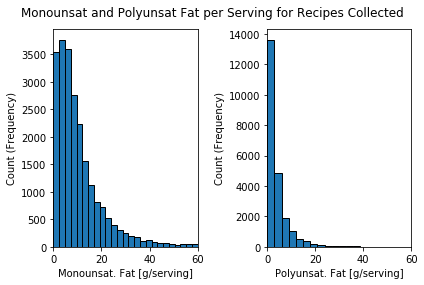

In [129]:
#Plotting total monounsaturated fat and polyunsaturated fat per serving for recipes dataframe:
subplot_histograms(dataframe = df_recs, 
                   list_of_columns = ['monounsat_fat_g_per_serv', 'polyunsat_fat_g_per_serv'],
                   list_of_titles = 'Monounsat and Polyunsat Fat per Serving for Recipes Collected',
                   list_of_xlabels = ['Monounsat. Fat [g/serving]', 'Polyunsat. Fat [g/serving]'],
                   bin_num = [200, 100],
                   xlims = [60, 60])

It looks like most recipes have monounsaturated fat content below 20 g/serving, and most recipes have polyunsaturated fat content below 20 g/serving.  Some upper outliers skewed the distributions to the right.

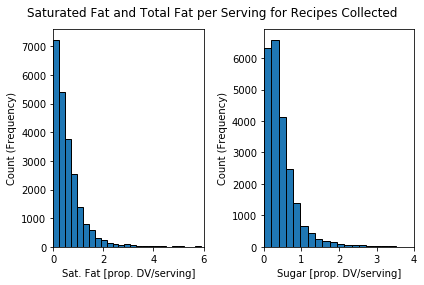

In [130]:
#Plotting saturated fat and total fat per serving for recipes dataframe:
subplot_histograms(dataframe = df_recs, 
                   list_of_columns = ['sat_fat_pct_div100_per_serv', 'fat_pct_div100_per_serv'],
                   list_of_titles = 'Saturated Fat and Total Fat per Serving for Recipes Collected',
                   list_of_xlabels = ['Sat. Fat [prop. DV/serving]', 'Sugar [prop. DV/serving]'],
                   bin_num = [100, 100],
                   xlims = [6, 4])

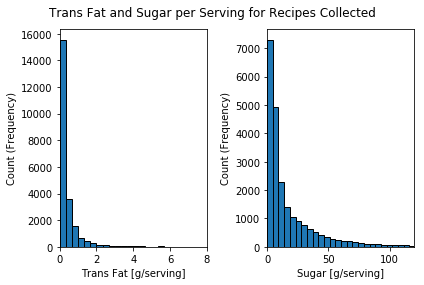

In [132]:
#Plotting trans fat and sugar per serving for recipes dataframe:
subplot_histograms(dataframe = df_recs, 
                   list_of_columns = ['trans_fat_g_per_serv', 'sugar_g_per_serv'],
                   list_of_titles = 'Trans Fat and Sugar per Serving for Recipes Collected',
                   list_of_xlabels = ['Trans Fat [g/serving]', 'Sugar [g/serving]'],
                   bin_num = [100, 200],
                   xlims = [8, 120])

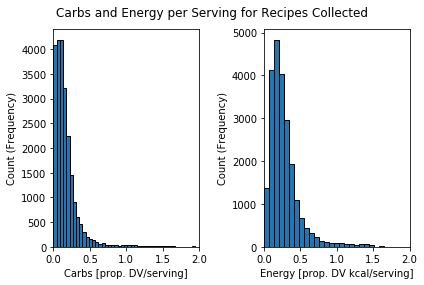

In [133]:
#Plotting carbs and energy per serving for recipes dataframe:
subplot_histograms(dataframe = df_recs, 
                   list_of_columns = ['carbs_pct_div100_per_serv', 'energy_pct_div100_per_serv'],
                   list_of_titles = 'Carbs and Energy per Serving for Recipes Collected',
                   list_of_xlabels = ['Carbs [prop. DV/serving]', 'Energy [prop. DV kcal/serving]'],
                   bin_num = [100, 200],
                   xlims = [2, 2])

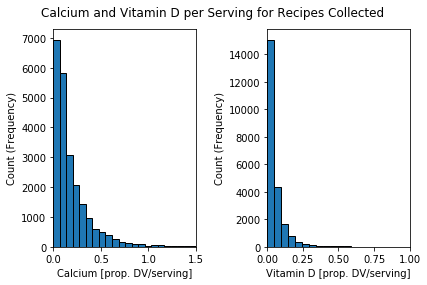

In [134]:
#Plotting calcium and vitamin D per serving for recipes dataframe:
subplot_histograms(dataframe = df_recs, 
                   list_of_columns = ['calcium_pct_div100_per_serv', 'vit_D_pct_div100_per_serv'],
                   list_of_titles = 'Calcium and Vitamin D per Serving for Recipes Collected',
                   list_of_xlabels = ['Calcium [prop. DV/serving]', 'Vitamin D [prop. DV/serving]'],
                   bin_num = [100, 200],
                   xlims = [1.5, 1])

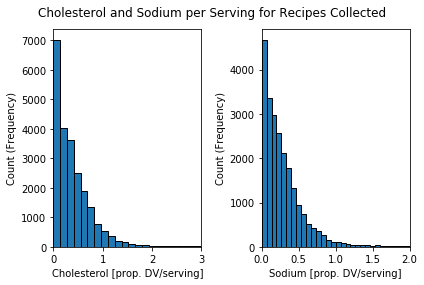

In [135]:
#Plotting cholesterol and sodium per serving for recipes dataframe:
subplot_histograms(dataframe = df_recs, 
                   list_of_columns = ['cholesterol_pct_div100_per_serv', 'sodium_pct_div100_per_serv'],
                   list_of_titles = 'Cholesterol and Sodium per Serving for Recipes Collected',
                   list_of_xlabels = ['Cholesterol [prop. DV/serving]', 'Sodium [prop. DV/serving]'],
                   bin_num = [300, 200],
                   xlims = [3, 2])

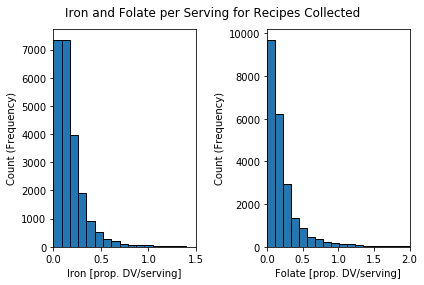

In [136]:
#Plotting iron and folate per serving for recipes dataframe:
subplot_histograms(dataframe = df_recs, 
                   list_of_columns = ['iron_pct_div100_per_serv', 'folate_pct_div100_per_serv'],
                   list_of_titles = 'Iron and Folate per Serving for Recipes Collected',
                   list_of_xlabels = ['Iron [prop. DV/serving]', 'Folate [prop. DV/serving]'],
                   bin_num = [100, 200],
                   xlims = [1.5, 2])

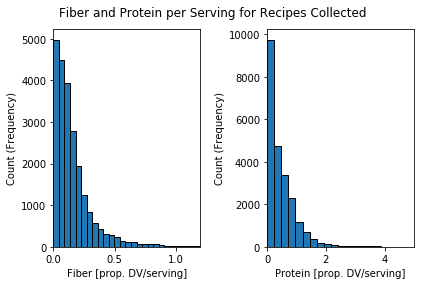

In [138]:
#Plotting fiber and protein per serving for recipes dataframe:
subplot_histograms(dataframe = df_recs, 
                   list_of_columns = ['fiber_pct_div100_per_serv', 'protein_pct_div100_per_serv'],
                   list_of_titles = 'Fiber and Protein per Serving for Recipes Collected',
                   list_of_xlabels = ['Fiber [prop. DV/serving]', 'Protein [prop. DV/serving]'],
                   bin_num = [100, 300],
                   xlims = [1.2, 5])

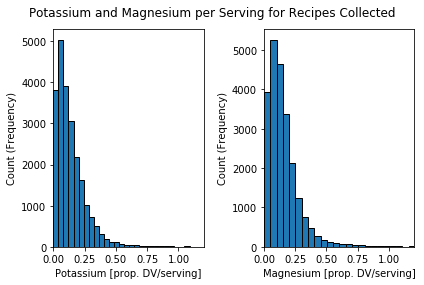

In [139]:
#Plotting potassium and magnesium per serving for recipes dataframe:
subplot_histograms(dataframe = df_recs, 
                   list_of_columns = ['potassium_pct_div100_per_serv', 'magnesium_pct_div100_per_serv'],
                   list_of_titles = 'Potassium and Magnesium per Serving for Recipes Collected',
                   list_of_xlabels = ['Potassium [prop. DV/serving]', 'Magnesium [prop. DV/serving]'],
                   bin_num = [200, 200],
                   xlims = [1.2, 1.2])

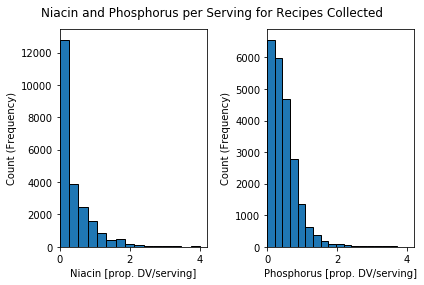

In [141]:
#Plotting niacin and phosphorus per serving for recipes dataframe:
subplot_histograms(dataframe = df_recs, 
                   list_of_columns = ['niacin_pct_div100_per_serv', 'phosphorus_pct_div100_per_serv'],
                   list_of_titles = 'Niacin and Phosphorus per Serving for Recipes Collected',
                   list_of_xlabels = ['Niacin [prop. DV/serving]', 'Phosphorus [prop. DV/serving]'],
                   bin_num = [300, 200],
                   xlims = [4.2, 4.2])

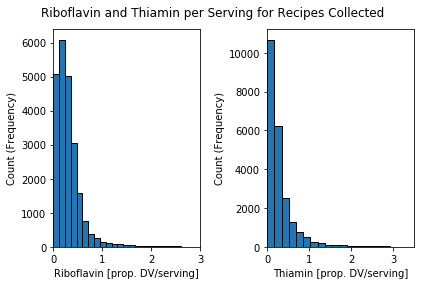

In [143]:
#Plotting riboflavin and thiamin per serving for recipes dataframe:
subplot_histograms(dataframe = df_recs, 
                   list_of_columns = ['riboflavin_pct_div100_per_serv', 'thiamin_pct_div100_per_serv'],
                   list_of_titles = 'Riboflavin and Thiamin per Serving for Recipes Collected',
                   list_of_xlabels = ['Riboflavin [prop. DV/serving]', 'Thiamin [prop. DV/serving]'],
                   bin_num = [200, 200],
                   xlims = [3, 3.5])

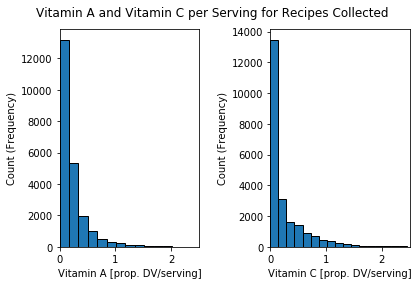

In [146]:
#Plotting vitamin A and vitamin C per serving for recipes dataframe:
subplot_histograms(dataframe = df_recs, 
                   list_of_columns = ['vit_A_pct_div100_per_serv', 'vit_C_pct_div100_per_serv'],
                   list_of_titles = 'Vitamin A and Vitamin C per Serving for Recipes Collected',
                   list_of_xlabels = ['Vitamin A [prop. DV/serving]', 'Vitamin C [prop. DV/serving]'],
                   bin_num = [350, 100],
                   xlims = [2.5, 2.5])

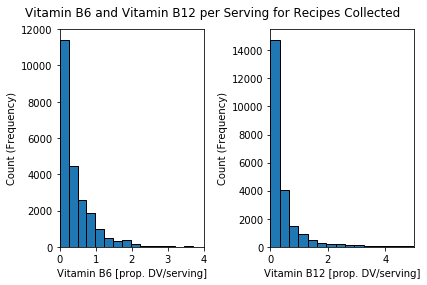

In [149]:
#Plotting vitamin B6 and vitamin B12 per serving for recipes dataframe:
subplot_histograms(dataframe = df_recs, 
                   list_of_columns = ['vit_B6_pct_div100_per_serv', 'vit_B12_pct_div100_per_serv'],
                   list_of_titles = 'Vitamin B6 and Vitamin B12 per Serving for Recipes Collected',
                   list_of_xlabels = ['Vitamin B6 [prop. DV/serving]', 'Vitamin B12 [prop. DV/serving]'],
                   bin_num = [300, 350],
                   xlims = [4, 5])

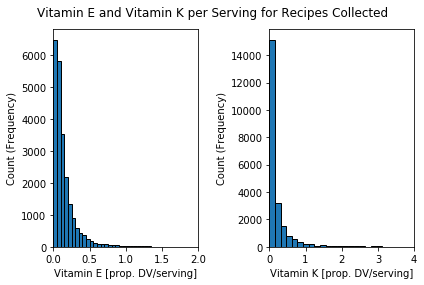

In [153]:
#Plotting vitamin E and vitamin K per serving for recipes dataframe:
subplot_histograms(dataframe = df_recs, 
                   list_of_columns = ['vit_E_pct_div100_per_serv', 'vit_K_pct_div100_per_serv'],
                   list_of_titles = 'Vitamin E and Vitamin K per Serving for Recipes Collected',
                   list_of_xlabels = ['Vitamin E [prop. DV/serving]', 'Vitamin K [prop. DV/serving]'],
                   bin_num = [100, 200],
                   xlims = [2, 4])

Most of the nutrients have right-skewed distributions.  It appears that there are quite a few outliers.  It is pretty amazing that there are so many recipes with greater than 100% of daily value of some nutrients in each serving.  This can be concerning when the nutrient needs to be minimized such as when people are trying to avoid cholesterol.  

### Inspecting Categorical Data Distributions in the Recipes Dataset

In [154]:
df_recs.dtypes.value_counts()

int64      302
float64     34
object       2
dtype: int64

In [157]:
cols_objects = df_recs.select_dtypes(include = int).columns
cols_objects

Index(['source_BigOven', 'source_Cookstr', 'source_Delish',
       'source_Epicurious', 'source_Food Network', 'source_Food52',
       'source_Foodista', 'source_Good Housekeeping', 'source_Group Recipes',
       'source_Kitchen Daily',
       ...
       'ingredient_category_water', 'ingredient_category_wines',
       'ingredient_category_yogurt',
       'ingredient_category_condiments_and_sauces',
       'ingredient_category_cured_meats', 'ingredient_category_frozen_poultry',
       'ingredient_category_plant_based_protein',
       'ingredient_category_liquors_and_cocktails',
       'ingredient_category_sugar_and_syrups', 'nutrition_score'],
      dtype='object', length=302)

In [163]:
cols_source = []
for col in cols_objects:
    if 'source' in col:
        cols_source.append(col)
cols_source

['source_BigOven',
 'source_Cookstr',
 'source_Delish',
 'source_Epicurious',
 'source_Food Network',
 'source_Food52',
 'source_Foodista',
 'source_Good Housekeeping',
 'source_Group Recipes',
 'source_Kitchen Daily',
 'source_Kraft Foods',
 'source_Martha Stewart',
 'source_My Recipes',
 'source_Saveur',
 'source_Serious Eats',
 'source_Taste of Home',
 'source_Williams-Sonoma',
 'source_food.com',
 'source_recipezaar.com',
 'source_nan']

In [165]:
df_recs[cols_source].sum().sort_values(ascending = False)

source_food.com             2832
source_Food Network         1911
source_Group Recipes        1694
source_recipezaar.com       1334
source_Taste of Home        1330
source_Martha Stewart       1324
source_BigOven              1313
source_My Recipes           1291
source_Delish               1268
source_Foodista             1152
source_Food52                786
source_Epicurious            543
source_Williams-Sonoma       511
source_Serious Eats          480
source_Cookstr               447
source_Good Housekeeping     405
source_Kraft Foods           386
source_Saveur                376
source_Kitchen Daily         372
source_nan                     0
dtype: int64

In [324]:
nutr_food_com = df_recs[df_recs['source_food.com'] == 1]['nutrition_score']
nutr_food_netwk = df_recs[df_recs['source_Food Network'] == 1]['nutrition_score']
nutr_group_recs = df_recs[df_recs['source_Group Recipes'] == 1]['nutrition_score']
nutr_recipezaar = df_recs[df_recs['source_recipezaar.com'] == 1]['nutrition_score']
nutr_taste_home = df_recs[df_recs['source_Taste of Home'] == 1]['nutrition_score']
nutr_martha_stewart = df_recs[df_recs['source_Martha Stewart'] == 1]['nutrition_score']
nutr_big_oven = df_recs[df_recs['source_BigOven'] == 1]['nutrition_score']
nutr_my_recipes = df_recs[df_recs['source_My Recipes'] == 1]['nutrition_score']
nutr_delish = df_recs[df_recs['source_Delish'] == 1]['nutrition_score']
nutr_foodista = df_recs[df_recs['source_Foodista'] == 1]['nutrition_score']
nutr_food52 =  df_recs[df_recs['source_Food52'] == 1]['nutrition_score']
nutr_epicurious =  df_recs[df_recs['source_Epicurious'] == 1]['nutrition_score']
nutr_williams_sonoma =  df_recs[df_recs['source_Williams-Sonoma'] == 1]['nutrition_score']
nutr_serious_eats = df_recs[df_recs['source_Serious Eats'] == 1]['nutrition_score']
nutr_cookstr = df_recs[df_recs['source_Cookstr'] == 1]['nutrition_score']
nutr_good_housekeeping = df_recs[df_recs['source_Good Housekeeping'] == 1]['nutrition_score']
nutr_kraft = df_recs[df_recs['source_Kraft Foods'] == 1]['nutrition_score']
nutr_saveur = df_recs[df_recs['source_Saveur'] == 1]['nutrition_score']
nutr_kitchen_daily = df_recs[df_recs['source_Kitchen Daily'] == 1]['nutrition_score']


nutr_all_recipes = df_recs[(df_recs['source_food.com'] == 0) & (df_recs['source_Food Network'] == 0) &
                           (df_recs['source_Group Recipes'] == 0) & (df_recs['source_recipezaar.com'] == 0) &
                           (df_recs['source_Taste of Home'] == 0) & (df_recs['source_Martha Stewart'] == 0) &
                           (df_recs['source_BigOven'] == 0) & (df_recs['source_My Recipes'] == 0) &
                           (df_recs['source_Delish'] == 0) & (df_recs['source_Foodista'] == 0) &
                           (df_recs['source_Food52'] == 0) & (df_recs['source_Epicurious'] == 0) &
                           (df_recs['source_Williams-Sonoma'] == 0) & (df_recs['source_Serious Eats'] == 0) &
                           (df_recs['source_Cookstr'] == 0) & (df_recs['source_Good Housekeeping'] == 0) &
                           (df_recs['source_Kraft Foods'] == 0) & (df_recs['source_Saveur'] == 0) &
                           (df_recs['source_Kitchen Daily'] == 0)]['nutrition_score']

In [332]:
len(nutr_all_recipes)

3186

In [326]:
def subplot_histograms_noDF(lists_data, fig_size, title, list_of_titles, list_of_xlabels, bin_num, xlims, adj):
    nrows = int(np.ceil(len(lists_data)/3)) # Makes sure have enough rows
    fig, ax = plt.subplots(nrows = nrows, ncols = 3, sharey = False, figsize = fig_size) 
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.suptitle(title) #Setting title for group of plots
    #ax[0].set_ylabel('Count (Frequency)') #Setting y-axis label for subplot i
    for i in range(len(lists_data)): # Gives us an index value to get into all our lists
        ax[i].hist(lists_data[i], bins = bin_num[i], edgecolor = 'black') # used settings (chose to use 10 bins)
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i]) #Setting x-axis label for subplot i  
        ax[i].set_ylabel('Count (Frequency)') 
        ax[i].set_xlim(0, xlims[i])
    fig.tight_layout() #this helped to increase space between subplot histograms
    plt.subplots_adjust(top = adj) #this helped to increase space between the title and the subplot histograms

    
#Sources used to write function:
#Used the link above (https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) 
#as well as the following link to format plots as desired:
#https://stackoverflow.com/questions/8248467/matplotlib-tight-layout-doesnt-take-into-account-figure-suptitle
#https://stackoverflow.com/questions/6963035/pyplot-axes-labels-for-subplots
#https://stackoverflow.com/questions/42741687/python-histogram-outline

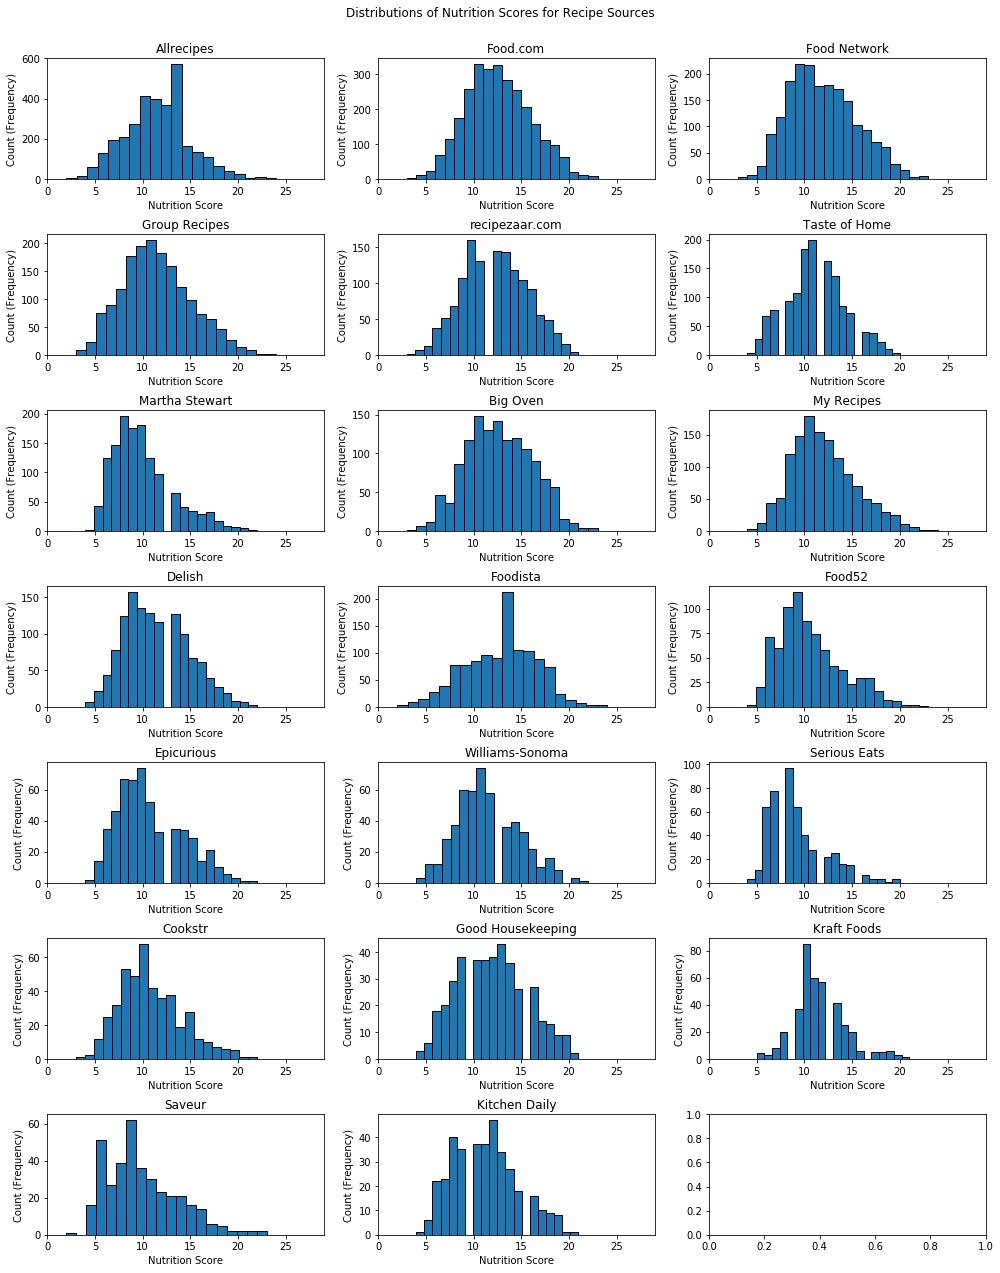

In [327]:
#Plotting vitamin B6 and vitamin B12 per serving for recipes dataframe:
lists_data = [nutr_all_recipes, nutr_food_com, nutr_food_netwk, nutr_group_recs, nutr_recipezaar, 
              nutr_taste_home, nutr_martha_stewart, nutr_big_oven, nutr_my_recipes, nutr_delish, 
              nutr_foodista, nutr_food52, nutr_epicurious, nutr_williams_sonoma, nutr_serious_eats, 
              nutr_cookstr, nutr_good_housekeeping, nutr_kraft, nutr_saveur, nutr_kitchen_daily]

fig_size = (14,18)

title = 'Distributions of Nutrition Scores for Recipe Sources'

list_of_titles = ['Allrecipes', 'Food.com', 'Food Network', 'Group Recipes', 'recipezaar.com', 
                  'Taste of Home', 'Martha Stewart', 'Big Oven', 'My Recipes', 'Delish', 
                  'Foodista', 'Food52', 'Epicurious', 'Williams-Sonoma', 'Serious Eats', 
                  'Cookstr', 'Good Housekeeping', 'Kraft Foods', 'Saveur', 'Kitchen Daily']

list_of_xlabels = ['Nutrition Score'] * 20


subplot_histograms_noDF(lists_data,
                        fig_size,
                        title,
                        list_of_titles,
                        list_of_xlabels, 
                        bin_num = [20]*20,
                        xlims = [29] *20,
                        adj = 0.94);


I am surprised that some sites don't have higher health scores than I expected.  I think this is because a lot of alcoholic drinks from sites could have skewed distributions to the left.  I'd like to remove alcoholic beverages from the dataframe and to redo this analysis in the future to see if the nutrition score distributions will change for each source.

In [166]:
cols_diet_labels = []
for col in cols_objects:
    if 'diet_label' in col:
        cols_diet_labels.append(col)
cols_diet_labels

['diet_labels_Balanced',
 'diet_labels_High-Fiber',
 'diet_labels_High-Protein',
 'diet_labels_Low-Carb',
 'diet_labels_Low-Fat',
 'diet_labels_Low-Sodium']

In [167]:
df_recs[cols_diet_labels].sum().sort_values(ascending = False)

diet_labels_Low-Carb        5840
diet_labels_High-Fiber      5582
diet_labels_Low-Sodium      4145
diet_labels_Low-Fat         2010
diet_labels_Balanced        1885
diet_labels_High-Protein     446
dtype: int64

In [334]:
nutr_low_carb = df_recs[df_recs['diet_labels_Low-Carb'] == 1]['nutrition_score']
nutr_high_fiber = df_recs[df_recs['diet_labels_High-Fiber'] == 1]['nutrition_score']
nutr_low_sodium = df_recs[df_recs['diet_labels_Low-Sodium'] == 1]['nutrition_score']
nutr_low_fat = df_recs[df_recs['diet_labels_Low-Fat'] == 1]['nutrition_score']
nutr_balanced = df_recs[df_recs['diet_labels_Balanced'] == 1]['nutrition_score']
nutr_high_protein = df_recs[df_recs['diet_labels_High-Protein'] == 1]['nutrition_score']

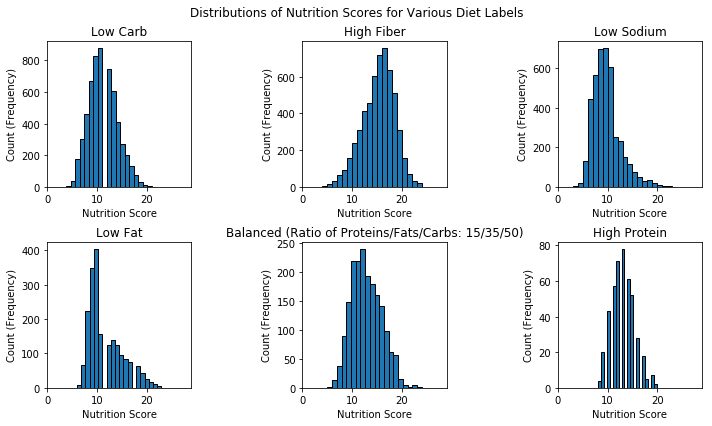

In [341]:
#Plotting nutrient distributions for recipes with specific diet labels:
lists_data = [nutr_low_carb, nutr_high_fiber, nutr_low_sodium,
              nutr_low_fat, nutr_balanced, nutr_high_protein]

fig_size = (10,6)

title = 'Distributions of Nutrition Scores for Various Diet Labels'

list_of_titles = ['Low Carb', 'High Fiber', 'Low Sodium',
                  'Low Fat', 'Balanced (Ratio of Proteins/Fats/Carbs: 15/35/50)', 'High Protein']

list_of_xlabels = ['Nutrition Score'] * 6


subplot_histograms_noDF(lists_data,
                        fig_size,
                        title,
                        list_of_titles,
                        list_of_xlabels, 
                        bin_num = [20] * 6,
                        xlims = [29] * 6,
                        adj = 0.9);

In [169]:
cols_health_labels = []
for col in cols_objects:
    if 'health_label' in col:
        cols_health_labels.append(col)
cols_health_labels

['health_labels_Alcohol-Cocktail',
 'health_labels_Alcohol-Free',
 'health_labels_Celery-Free',
 'health_labels_Crustacean-Free',
 'health_labels_Dairy-Free',
 'health_labels_Egg-Free',
 'health_labels_Fish-Free',
 'health_labels_Gluten-Free',
 'health_labels_Keto-Friendly',
 'health_labels_Kidney-Friendly',
 'health_labels_Kosher',
 'health_labels_Low Potassium',
 'health_labels_Low Sugar',
 'health_labels_Lupine-Free',
 'health_labels_Mollusk-Free',
 'health_labels_Mustard-Free',
 'health_labels_No oil added',
 'health_labels_Paleo',
 'health_labels_Peanut-Free',
 'health_labels_Pescatarian',
 'health_labels_Pork-Free',
 'health_labels_Red-Meat-Free',
 'health_labels_Sesame-Free',
 'health_labels_Shellfish-Free',
 'health_labels_Soy-Free',
 'health_labels_Sugar-Conscious',
 'health_labels_Tree-Nut-Free',
 'health_labels_Vegan',
 'health_labels_Vegetarian',
 'health_labels_Wheat-Free']

In [171]:
df_recs[cols_health_labels].sum().sort_values(ascending = False)

health_labels_Lupine-Free         22938
health_labels_Mollusk-Free        22529
health_labels_Sesame-Free         22459
health_labels_Crustacean-Free     22153
health_labels_Peanut-Free         22124
health_labels_Shellfish-Free      22055
health_labels_Celery-Free         21459
health_labels_Fish-Free           21332
health_labels_Mustard-Free        20949
health_labels_Soy-Free            20901
health_labels_Tree-Nut-Free       20841
health_labels_Alcohol-Free        20436
health_labels_Pork-Free           19289
health_labels_Red-Meat-Free       17280
health_labels_Kosher              14492
health_labels_Egg-Free            14378
health_labels_Pescatarian         11944
health_labels_Vegetarian          11582
health_labels_Wheat-Free           9224
health_labels_Gluten-Free          9112
health_labels_Dairy-Free           7205
health_labels_Sugar-Conscious      6036
health_labels_Kidney-Friendly      4411
health_labels_No oil added         4275
health_labels_Low Potassium        2665


In [276]:
nutr_kosher = df_recs[df_recs['health_labels_Kosher'] == 1]['nutrition_score']
nutr_pescatarian = df_recs[df_recs['health_labels_Pescatarian'] == 1]['nutrition_score']
nutr_vegetarian = df_recs[df_recs['health_labels_Vegetarian'] == 1]['nutrition_score']
nutr_gluten_free = df_recs[df_recs['health_labels_Gluten-Free'] == 1]['nutrition_score']
nutr_dairy_free = df_recs[df_recs['health_labels_Dairy-Free'] == 1]['nutrition_score']
nutr_keto = df_recs[df_recs['health_labels_Keto-Friendly'] == 1]['nutrition_score']
nutr_vegan = df_recs[df_recs['health_labels_Vegan'] == 1]['nutrition_score']
nutr_paleo = df_recs[df_recs['health_labels_Paleo'] == 1]['nutrition_score']


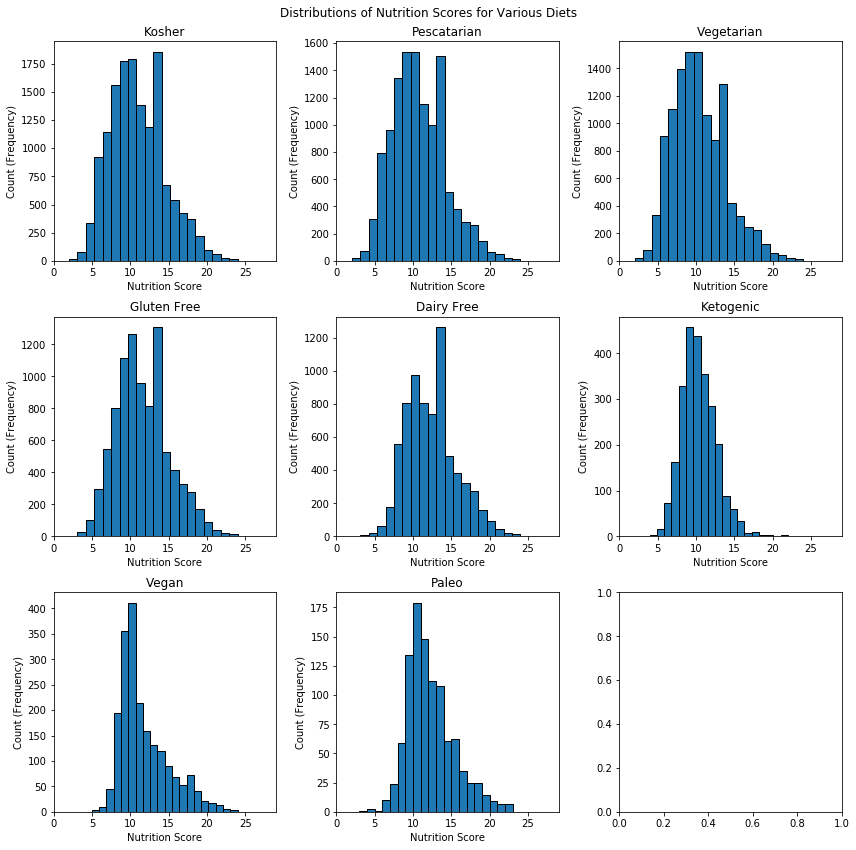

In [305]:
#Plotting vitamin B6 and vitamin B12 per serving for recipes dataframe:
lists_data = [nutr_kosher, nutr_pescatarian, nutr_vegetarian, nutr_gluten_free, 
              nutr_dairy_free, nutr_keto, nutr_vegan, nutr_paleo]

fig_size = (12,12)

title = 'Distributions of Nutrition Scores for Various Diets'

list_of_titles = ['Kosher', 'Pescatarian', 'Vegetarian', 'Gluten Free',
                  'Dairy Free', 'Ketogenic', 'Vegan', 'Paleo']

list_of_xlabels = ['Nutrition Score'] * 8


subplot_histograms_noDF(lists_data,
                        fig_size,
                        title,
                        list_of_titles,
                        list_of_xlabels, 
                        bin_num = [20] * 8,
                        xlims = [29] * 8,
                        adj = 0.94);


In [172]:
cols_cautions = []
for col in cols_objects:
    if 'caution' in col:
        cols_cautions.append(col)
cols_cautions

['cautions_FODMAP', 'cautions_Sulfites']

In [173]:
df_recs[cols_cautions].sum().sort_values(ascending = False)

cautions_Sulfites    18984
cautions_FODMAP       7210
dtype: int64

In [292]:
nutr_sulfites = df_recs[df_recs['cautions_Sulfites'] == 1]['nutrition_score']
nutr_FODMAP = df_recs[df_recs['cautions_FODMAP'] == 1]['nutrition_score']

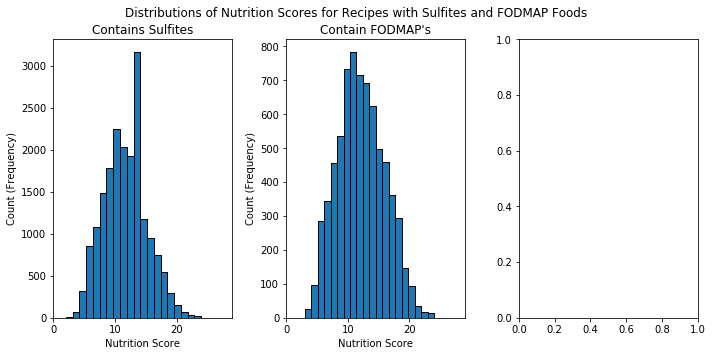

In [307]:
#Plotting distributions of nutrition for foods containing sulfites and FODMAP foods:
lists_data = [nutr_sulfites, nutr_FODMAP]

fig_size = (10, 5)

title = 'Distributions of Nutrition Scores for Recipes with Sulfites and FODMAP Foods'

list_of_titles = ["Contains Sulfites", "Contain FODMAP's"]

list_of_xlabels = ['Nutrition Score'] * 2


subplot_histograms_noDF(lists_data,
                        fig_size,
                        title,
                        list_of_titles,
                        list_of_xlabels, 
                        bin_num = [20] * 2,
                        xlims = [29] * 2,
                        adj = 0.89);


In [174]:
cols_cuisine_type = []
for col in cols_objects:
    if 'cuisine_type' in col:
        cols_cuisine_type.append(col)
cols_cuisine_type

['cuisine_type_.',
 'cuisine_type_4 Points',
 'cuisine_type_African',
 'cuisine_type_Albanian',
 'cuisine_type_Amerian',
 'cuisine_type_American',
 'cuisine_type_American, Barbecue, Southern',
 'cuisine_type_American, French',
 'cuisine_type_American, Italian',
 'cuisine_type_American, Southern',
 'cuisine_type_American-South',
 'cuisine_type_American|Asian',
 'cuisine_type_American|North American|Cajun/Creole',
 'cuisine_type_Amish',
 'cuisine_type_Andhra',
 'cuisine_type_Appetizer',
 'cuisine_type_Arab',
 'cuisine_type_Argentinian',
 'cuisine_type_Armenian',
 'cuisine_type_Asian',
 'cuisine_type_Asian, Chinese',
 'cuisine_type_Aussie',
 'cuisine_type_Australian',
 'cuisine_type_Australian/New Zealand',
 'cuisine_type_Austrian',
 'cuisine_type_Baking',
 'cuisine_type_Balochi',
 'cuisine_type_Bangladeshi',
 'cuisine_type_Belarusian',
 'cuisine_type_Belgian',
 'cuisine_type_Belgium',
 'cuisine_type_Brazilian',
 'cuisine_type_Breakfast',
 'cuisine_type_British',
 'cuisine_type_BritishEur

In [176]:
df_recs[cols_cuisine_type].sum().sort_values(ascending = False)

cuisine_type_American                   8945
cuisine_type_Italian                    3429
cuisine_type_French                     2311
cuisine_type_British                    1343
cuisine_type_Mexican                    1063
cuisine_type_Mediterranean               811
cuisine_type_Chinese                     556
cuisine_type_Indian                      437
cuisine_type_Greek                       361
cuisine_type_South American              345
cuisine_type_German                      285
cuisine_type_Spanish                     284
cuisine_type_Thai                        194
cuisine_type_Japanese                    170
cuisine_type_Danish                      132
cuisine_type_Eastern Europe              127
cuisine_type_Russian                     127
cuisine_type_Arab                        125
cuisine_type_Cajun                       121
cuisine_type_Caribbean                   111
cuisine_type_Brazilian                    87
cuisine_type_Moroccan                     81
cuisine_ty

In [309]:
nutr_american = df_recs[df_recs['cuisine_type_American'] == 1]['nutrition_score']
nutr_italian = df_recs[df_recs['cuisine_type_Italian'] == 1]['nutrition_score']
nutr_french = df_recs[df_recs['cuisine_type_French'] == 1]['nutrition_score']
nutr_british = df_recs[df_recs['cuisine_type_British'] == 1]['nutrition_score']
nutr_mexican = df_recs[df_recs['cuisine_type_Mexican'] == 1]['nutrition_score']
nutr_mediterranean = df_recs[df_recs['cuisine_type_Mediterranean'] == 1]['nutrition_score']
nutr_chinese = df_recs[df_recs['cuisine_type_Chinese'] == 1]['nutrition_score']
nutr_indian = df_recs[df_recs['cuisine_type_Indian'] == 1]['nutrition_score']
nutr_greek = df_recs[df_recs['cuisine_type_Greek'] == 1]['nutrition_score']
nutr_south_american = df_recs[df_recs['cuisine_type_South American'] == 1]['nutrition_score']
nutr_german = df_recs[df_recs['cuisine_type_German'] == 1]['nutrition_score']
nutr_spanish = df_recs[df_recs['cuisine_type_Spanish'] == 1]['nutrition_score']
nutr_thai = df_recs[df_recs['cuisine_type_Thai'] == 1]['nutrition_score']
nutr_japanese = df_recs[df_recs['cuisine_type_Japanese'] == 1]['nutrition_score']
nutr_danish = df_recs[df_recs['cuisine_type_Danish'] == 1]['nutrition_score']
nutr_eastern_european = df_recs[df_recs['cuisine_type_Eastern Europe'] == 1]['nutrition_score']
nutr_russian = df_recs[df_recs['cuisine_type_Russian'] == 1]['nutrition_score']
nutr_arab = df_recs[df_recs['cuisine_type_Arab'] == 1]['nutrition_score']
nutr_cajun = df_recs[df_recs['cuisine_type_Cajun'] == 1]['nutrition_score']
nutr_caribbean = df_recs[df_recs['cuisine_type_Caribbean'] == 1]['nutrition_score']
nutr_brazilian = df_recs[df_recs['cuisine_type_Brazilian'] == 1]['nutrition_score']


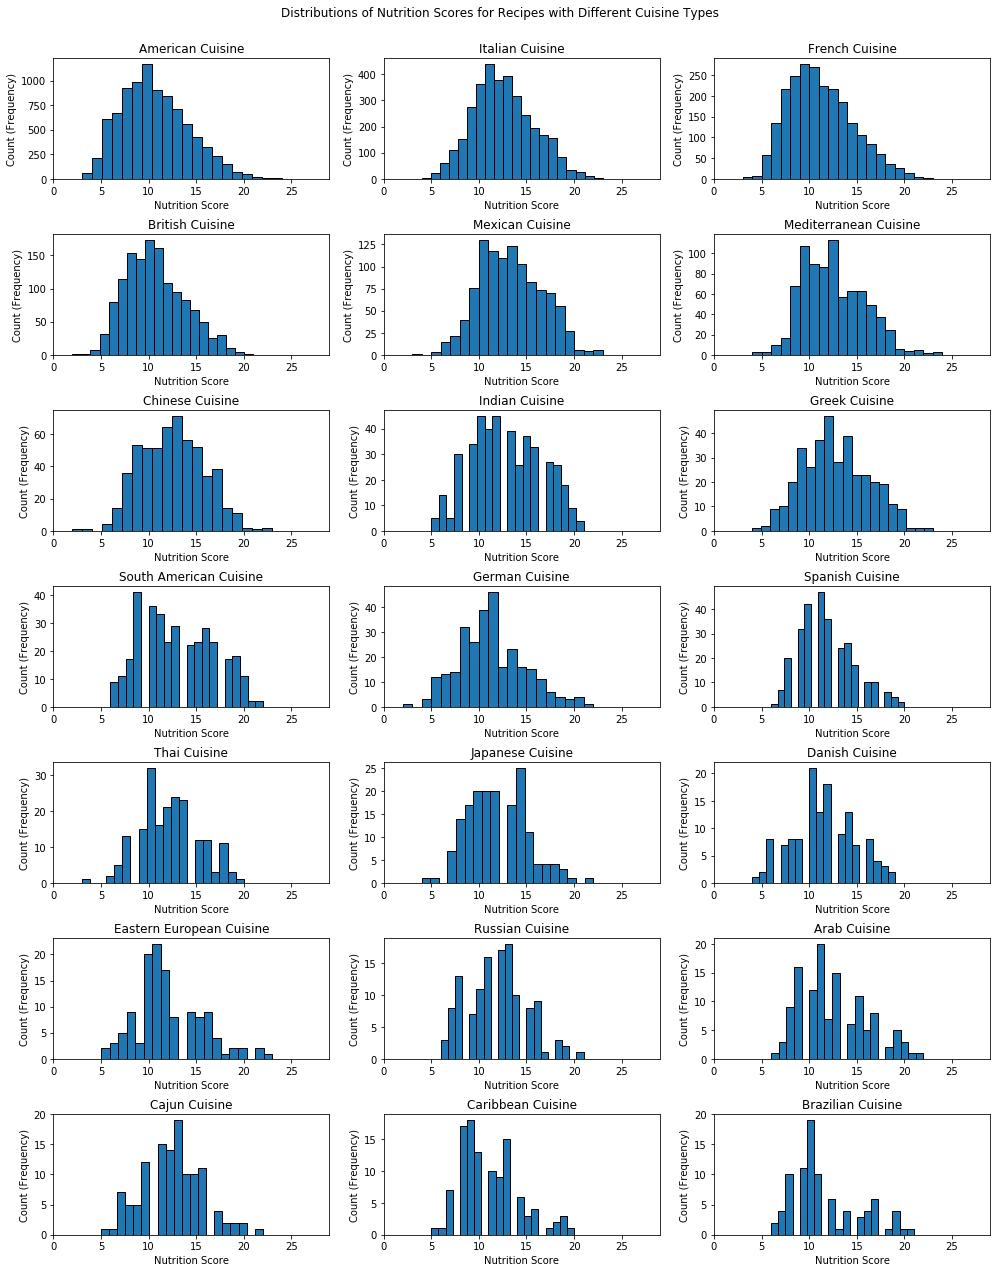

In [312]:
#Plotting nutrtion distribution for different cuisine types in the recipes dataframe:
lists_data = [nutr_american, nutr_italian, nutr_french, nutr_british, nutr_mexican, 
              nutr_mediterranean, nutr_chinese, nutr_indian, nutr_greek, nutr_south_american, 
              nutr_german, nutr_spanish, nutr_thai, nutr_japanese, nutr_danish, nutr_eastern_european, 
              nutr_russian, nutr_arab, nutr_cajun, nutr_caribbean, nutr_brazilian]

fig_size = (14, 18)

title = 'Distributions of Nutrition Scores for Recipes with Different Cuisine Types'

list_of_titles = ['American Cuisine', 'Italian Cuisine', 'French Cuisine', 'British Cuisine', 'Mexican Cuisine',
                  'Mediterranean Cuisine', 'Chinese Cuisine', 'Indian Cuisine', 'Greek Cuisine', 'South American Cuisine',
                  'German Cuisine', 'Spanish Cuisine', 'Thai Cuisine', 'Japanese Cuisine', 'Danish Cuisine', 'Eastern European Cuisine',
                  'Russian Cuisine', 'Arab Cuisine', 'Cajun Cuisine', 'Caribbean Cuisine', 'Brazilian Cuisine']

list_of_xlabels = ['Nutrition Score'] * 21


subplot_histograms_noDF(lists_data,
                        fig_size,
                        title,
                        list_of_titles,
                        list_of_xlabels, 
                        bin_num = [20] * 21,
                        xlims = [29] * 21,
                        adj = 0.94);

In [177]:
cols_dish_type = []
for col in cols_objects:
    if 'dish_type' in col:
        cols_dish_type.append(col)
cols_dish_type

['dish_type_breakfast',
 'dish_type_dessert',
 'dish_type_dinner',
 'dish_type_lunch',
 'dish_type_nibble']

In [178]:
df_recs[cols_dish_type].sum().sort_values(ascending = False)

dish_type_lunch        6835
dish_type_dinner       5617
dish_type_dessert      5463
dish_type_breakfast    3103
dish_type_nibble       1917
dtype: int64

In [311]:
nutr_lunch = df_recs[df_recs['dish_type_lunch'] == 1]['nutrition_score']
nutr_dinner = df_recs[df_recs['dish_type_dinner'] == 1]['nutrition_score']
nutr_dessert = df_recs[df_recs['dish_type_dessert'] == 1]['nutrition_score']
nutr_breakfast = df_recs[df_recs['dish_type_breakfast'] == 1]['nutrition_score']
nutr_nibble = df_recs[df_recs['dish_type_nibble'] == 1]['nutrition_score']

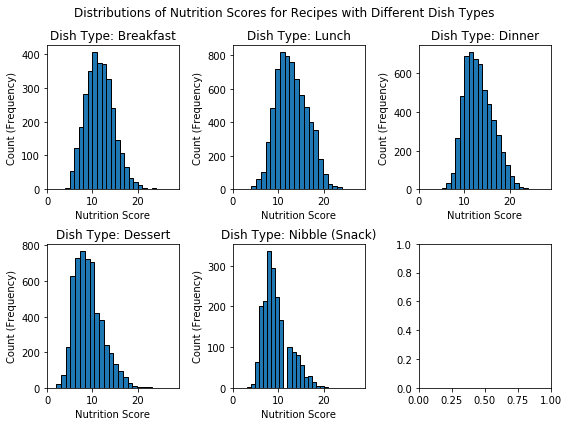

In [314]:
#Plotting nutrtion distribution for different cuisine types in the recipes dataframe:
lists_data = [nutr_breakfast, nutr_lunch, nutr_dinner, nutr_dessert, nutr_nibble]

fig_size = (8, 6)

title = 'Distributions of Nutrition Scores for Recipes with Different Dish Types'

list_of_titles = ['Dish Type: Breakfast', 'Dish Type: Lunch', 'Dish Type: Dinner',
                  'Dish Type: Dessert', 'Dish Type: Nibble (Snack)']

list_of_xlabels = ['Nutrition Score'] * 5


subplot_histograms_noDF(lists_data,
                        fig_size,
                        title,
                        list_of_titles,
                        list_of_xlabels, 
                        bin_num = [20] * 5,
                        xlims = [29] * 5,
                        adj = 0.89);

In [179]:
cols_ingredient_category = []
for col in cols_objects:
    if 'ingredient_category' in col:
        cols_ingredient_category.append(col)
cols_ingredient_category

['ingredient_category_100% fruit juice',
 'ingredient_category_100% juice',
 'ingredient_category_Baby food',
 'ingredient_category_Mexican',
 'ingredient_category_Vegan products',
 'ingredient_category_beer',
 'ingredient_category_bread, rolls and tortillas',
 'ingredient_category_candy',
 'ingredient_category_canned fruit',
 'ingredient_category_canned grains',
 'ingredient_category_canned meats',
 'ingredient_category_canned poultry',
 'ingredient_category_canned seafood',
 'ingredient_category_canned soup',
 'ingredient_category_canned vegetables',
 'ingredient_category_cheese',
 'ingredient_category_chocolate',
 'ingredient_category_coffee and tea',
 'ingredient_category_cooked grains',
 'ingredient_category_crackers',
 'ingredient_category_dairy',
 'ingredient_category_dried fruit and nuts',
 'ingredient_category_eggs',
 'ingredient_category_flavored water',
 'ingredient_category_frozen grained based',
 'ingredient_category_frozen grains',
 'ingredient_category_frozen treats',
 '

In [180]:
df_recs[cols_ingredient_category].sum().sort_values(ascending = False)

ingredient_category_condiments_and_sauces              22493
ingredient_category_vegetables                         12958
ingredient_category_dairy                              10093
ingredient_category_grains                              9229
ingredient_category_oils                                8815
ingredient_category_sugars                              8414
ingredient_category_eggs                                7200
ingredient_category_cheese                              6385
ingredient_category_canned soup                         5549
ingredient_category_fruit                               5542
ingredient_category_milk                                5110
ingredient_category_plant_based_protein                 4640
ingredient_category_poultry                             3943
ingredient_category_water                               3906
ingredient_category_bread, rolls and tortillas          3217
ingredient_category_canned vegetables                   3039
ingredient_category_meat

In [342]:
len(cols_ingredient_category)

59

In [182]:
df_recs['nutrition_score'].value_counts()

10    2745
11    2488
9     2342
12    2322
13    2063
8     1938
14    1683
15    1339
7     1315
16    1071
6     1047
17     831
18     625
5      374
19     340
20     174
4       91
21      76
22      35
3       19
23      15
24       5
2        3
Name: nutrition_score, dtype: int64

Text(0, 0.5, 'Count (Frequency)')

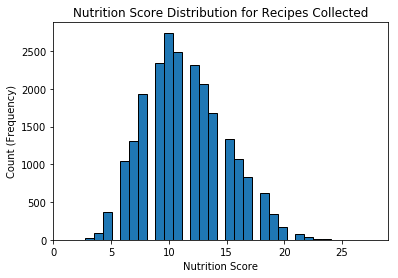

In [196]:
#Plotting nutrition score distribution for recipes dataframe:
plt.hist(df_recs['nutrition_score'], bins = 29, edgecolor = 'black')
plt.title('Nutrition Score Distribution for Recipes Collected')
plt.xlim(0,29)
plt.xlabel('Nutrition Score')
plt.ylabel('Count (Frequency)')